In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import&Install Pakage 

In [89]:
# 패키지 import
import tarfile
import os
import pandas as pd
import numpy as np
import random
import math

#!pip install selenium

!apt-get update

!apt install chromium-chromedriver

from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time
import sys

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [89.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [903 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bioni

# Data download & file extract

In [90]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=chrome_options)

In [99]:
path = '/content/drive/MyDrive/암마커추출/데이터다운/'
genome_path = '/content/drive/MyDrive/암마커추출/압축풀기/'
genome_name = ['LUAD', 'LUSC']

data = pd.DataFrame()
os.mkdir(path)
def download(x):
  for i in x:
    url = 'http://gdac.broadinstitute.org/runs/stddata__2016_01_28/data/{0}/20160128/gdac.broadinstitute.org_{0}.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.Level_3.2016012800.0.0.tar.gz'.format(i)
    driver.get(url)
download(genome_name)

# import shutil
# for i in genome_name:
#   shutil.move('/content/gdac.broadinstitute.org_{0}.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.Level_3.2016012800.0.0.tar.gz'.format(i),path)

In [3]:

def data_load(path, cancers):
  # path = '/content/drive/MyDrive/암마커추출/데이터다운/' # 압축 해제 전 데이터 경로
  # genome_path = '/content/drive/MyDrive/암마커추출/압축풀기/' # 압축 해제한 데이터 저장
  genome_path = f'{path}../해제파일/'
  cancer_name = cancers #입력 받는 암 데이터 명

  tar_list = os.listdir(path) #압축 해제 경로
  cancer_df = pd.DataFrame()
  for idx,f in enumerate(tar_list):
    genome = cancer_name[idx]
    ap = tarfile.open(path + f) #압축해제
    ap.extractall(genome_path) # 압축파일 저장
    ap.close 
  
    f_old = os.path.join(genome_path, f.split('.tar')[0]) 
    f_new = os.path.join(genome_path, f'{genome}')
    os.rename(f_old, f_new) # 폴더 명 암 이름으로 요약)
  
data_load('/content/drive/MyDrive/암마커추출/데이터다운/', ['LUAD', 'LUSC'])


# Data labeling & Loading

In [4]:
def data_labeling(path, cancers):
  genome_path = f'{path}../해제파일/'
  cancer_name = cancers
 
  tar_list = os.listdir(path) 
  cancer_df = pd.DataFrame()
  for idx,f in enumerate(tar_list):
    genome = cancer_name[idx]
    txt_list = os.listdir(f'{genome_path}{genome}/')
    file = ''.join([i for i in txt_list if str(genome) in i])

    data = pd.read_csv(f'{genome_path+genome}/{file}', sep='\t', low_memory=False, index_col='Hybridization REF', skiprows=[1])  
    data = data.T
    data['Cancer_info'] = data.index.str.slice(start=13, stop=16)
    data['Cancer_info'] = [f'{genome}_Tumor' if (t == '01A' or t == '02A') else f'{genome}_Normal' for t in list(data['Cancer_info'])]

    cancer_df = pd.concat([cancer_df, data])

  return cancer_df

data = data_labeling('/content/drive/MyDrive/암마커추출/데이터다운/', ['LUAD', 'LUSC'])
data

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Cancer_info
TCGA-05-4244-01A-01R-1107-07,0.0,10.0113,11.2820,49.5994,848.9397,0.0,345.2308,1.0472,0.0000,0.0,...,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0000,LUAD_Tumor
TCGA-05-4249-01A-01R-1107-07,0.0,7.1957,12.4436,90.5117,924.0158,0.0,145.2025,1.6098,0.0000,0.0,...,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0000,LUAD_Tumor
TCGA-05-4250-01A-01R-1107-07,0.0,7.2453,6.0184,49.5366,1140.6781,0.0,51.7284,0.0000,0.0000,0.0,...,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0000,LUAD_Tumor
TCGA-05-4382-01A-01R-1206-07,0.0,11.3311,7.5740,82.8303,807.1729,0.0,240.0221,0.4786,0.2393,0.0,...,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0000,LUAD_Tumor
TCGA-05-4384-01A-01R-1755-07,0.0,3.2254,3.4942,72.5351,562.0037,0.0,274.2822,0.6109,0.0000,0.0,...,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.3244,723.2743,378.1307,0.0000,LUAD_Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-O2-A52S-01A-11R-A262-07,0.0,19.9503,47.1026,176.7177,1188.3278,0.0,226.8212,1.6556,0.0000,0.0,...,507.4503,1392.7980,126.2417,580.2980,2681.7053,1069.5364,783.1126,5.3808,1.2417,LUSC_Tumor
TCGA-O2-A52V-01A-31R-A262-07,0.0,30.0872,15.2957,188.7215,1248.0303,0.0,147.4945,0.4202,0.0000,0.0,...,366.8453,1326.6099,6.3032,845.8872,6094.3376,663.9353,778.6532,2.1011,0.0000,LUSC_Tumor
TCGA-O2-A52W-01A-11R-A26W-07,0.0,53.6593,33.3907,260.3332,789.3606,0.0,854.3794,0.0000,0.0000,0.0,...,336.9156,2002.6867,101.5583,613.6486,2560.9887,730.2526,761.9559,12.3589,0.0000,LUSC_Tumor
TCGA-O2-A5IB-01A-11R-A27Q-07,0.0,72.5666,42.1832,160.1624,460.8626,0.0,569.2226,1.3312,0.0000,0.0,...,584.1321,2074.5474,150.4260,1155.2183,1185.0373,833.3333,1383.1203,1.0650,0.0000,LUSC_Tumor


# Machine Learning Modeling & Feature Importance 

In [58]:
data_Tumor = data[data['Cancer_info'].str.contains('Tumor')]

data_Tumor['Cancer_info'] = LabelEncoder().fit_transform(data_Tumor['Cancer_info'])
data_Tumor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Cancer_info
TCGA-05-4244-01A-01R-1107-07,0.0,10.0113,11.2820,49.5994,848.9397,0.0,345.2308,1.0472,0.0000,0.0,...,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0000,0
TCGA-05-4249-01A-01R-1107-07,0.0,7.1957,12.4436,90.5117,924.0158,0.0,145.2025,1.6098,0.0000,0.0,...,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0000,0
TCGA-05-4250-01A-01R-1107-07,0.0,7.2453,6.0184,49.5366,1140.6781,0.0,51.7284,0.0000,0.0000,0.0,...,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0000,0
TCGA-05-4382-01A-01R-1206-07,0.0,11.3311,7.5740,82.8303,807.1729,0.0,240.0221,0.4786,0.2393,0.0,...,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0000,0
TCGA-05-4384-01A-01R-1755-07,0.0,3.2254,3.4942,72.5351,562.0037,0.0,274.2822,0.6109,0.0000,0.0,...,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.3244,723.2743,378.1307,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-O2-A52S-01A-11R-A262-07,0.0,19.9503,47.1026,176.7177,1188.3278,0.0,226.8212,1.6556,0.0000,0.0,...,507.4503,1392.7980,126.2417,580.2980,2681.7053,1069.5364,783.1126,5.3808,1.2417,1
TCGA-O2-A52V-01A-31R-A262-07,0.0,30.0872,15.2957,188.7215,1248.0303,0.0,147.4945,0.4202,0.0000,0.0,...,366.8453,1326.6099,6.3032,845.8872,6094.3376,663.9353,778.6532,2.1011,0.0000,1
TCGA-O2-A52W-01A-11R-A26W-07,0.0,53.6593,33.3907,260.3332,789.3606,0.0,854.3794,0.0000,0.0000,0.0,...,336.9156,2002.6867,101.5583,613.6486,2560.9887,730.2526,761.9559,12.3589,0.0000,1
TCGA-O2-A5IB-01A-11R-A27Q-07,0.0,72.5666,42.1832,160.1624,460.8626,0.0,569.2226,1.3312,0.0000,0.0,...,584.1321,2074.5474,150.4260,1155.2183,1185.0373,833.3333,1383.1203,1.0650,0.0000,1


In [59]:
X_features = data_Tumor.iloc[:, :-1]
y_target = data_Tumor.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X_features, y_target, 
                                                    test_size=0.2, random_state=97, 
                                                    stratify=y_target)

In [60]:
params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
model = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(model, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, Y_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

#model = RandomForestClassifier(random_state=97)
#model.fit(X_train, Y_train)
# importances = model.feature_importances_

# n_features = X_train.shape[1]
# index = np.arange(n_features)

# model.fit(X_train, Y_train)

# importance_sorted = sorted(importances, reverse=True)
# print('RandomForest Feature Importance ')
# for i in importance_sorted[:10]:
#   print(i)

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최적 예측 정확도: 0.9517


In [61]:
model = RandomForestClassifier(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=200, random_state=0)

In [62]:
model = RandomForestClassifier(random_state=0, n_jobs=-1)
model.fit(X_train, Y_train)
importances = model.feature_importances_

n_features = X_train.shape[1]
index = np.arange(n_features)

model.fit(X_train, Y_train)

importance_sorted = sorted(importances, reverse=True)
print('RandomForest Feature Importance ')
for i in importance_sorted[:10]:
  print(i)

RandomForest Feature Importance 
0.020266697136571366
0.01741473039495967
0.017381677259511077
0.016883253124464023
0.013549379656201302
0.013341157657776225
0.011952251830594472
0.011888025589813878
0.011873061625267413
0.011636085762856479


# Selected Imporatance

In [66]:
importances_sort = sorted(importances, reverse=True)

best_gene = []
for top in range(len(importances)):
  if importances[top] > importances_sort[10]:
    best_gene.append(top)  

print('selected Feature :')
for d in data_Tumor.columns[best_gene]:
  print(d)

selected Feature :
C10orf99|387695
DSC3|1825
KRT77|374454
LASS3|204219
MUC1|4582
NKX2-1|7080
NMNAT3|349565
PARD6G|84552
PRR15L|79170
TRA2B|6434


# Feature Importance barplot

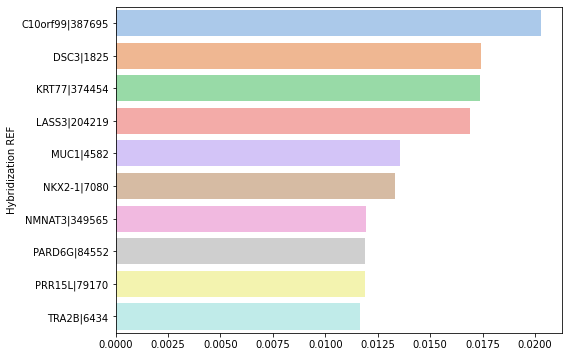

In [67]:
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
sns.barplot(x=importances_sort[:10], y=data_Tumor.columns[best_gene])
plt.show()

# performance evaluation RMSE

In [65]:
# train rmse
train_predict = model.predict(X_train)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, Y_train))) )
 
# test rmse
test_predict = model.predict(X_test
print("RMSE':{}".format(math.sqrt(mean_squared_error(test_predict, Y_test))) )

RMSE':0.0
RMSE':0.23335690592856784


# LUAD/LUSC Tumor Gene Difference heatmap

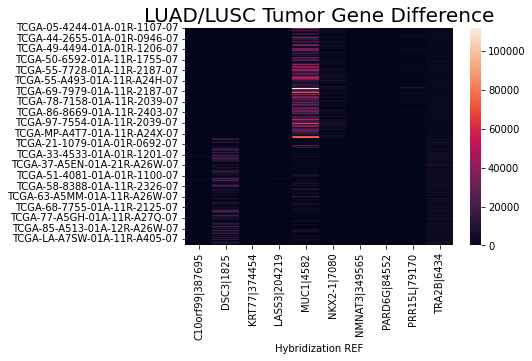

In [84]:
data_final = data_Tumor[data_Tumor.columns[best_gene]]

ax = sns.heatmap(data_final)
plt.title('LUAD/LUSC Tumor Gene Difference', fontsize=20)
plt.show()